<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/MelbourneHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MQ/First Session/Data Science/Week 3/Files/MELBOURNE_HOUSE_PRICES_LESS.csv', parse_dates=True)
#/content/drive/MyDrive/MQ/First Session/Data Science/Week 3/Files/Melbourne_housing_FULL.csv
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
# Check the dataframe shape
df.shape

(63023, 13)

There are 63023 fields and 13 columns.

In [ ]:
# check the columns available in dataframe
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [ ]:
# check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
# Measure of centre for house prices
df['Price'].describe()

,Price
count,4.843300e+04
mean,9.978982e+05
std,5.934989e+05
min,8.500000e+04
25%,6.200000e+05
50%,8.300000e+05
75%,1.220000e+06
max,1.120000e+07


In [ ]:
df['Rooms'].describe()

,Rooms
count,63023.000000
mean,3.110595
std,0.957551
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,31.000000


In [ ]:
#checking length of price series
len(df["Price"])

63023

In [ ]:
# counting number of null vavlues in each column
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,14590
Method,0
SellerG,0
Date,0
Postcode,0
Regionname,0


In [5]:
# drop the Null values in thee data DataFrame
clean_df = df.dropna()
clean_df.shape

(48433, 13)

In [6]:
clean_df['Price'].isna().sum()


0

In [7]:
len(clean_df['Price'])

48433

In [8]:
# new mean, median, standard devition

mean_price = clean_df['Price'].mean()
median_price = clean_df['Price'].median()
std_price = clean_df['Price'].std()
print("The mean price of house: ", mean_price)
print("The median price of house: ", median_price)
print("The standard deviation in price of house: ", std_price)

The mean price of house:  997898.2414882415
The median price of house:  830000.0
The standard deviation in price of house:  593498.9190372769


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='Price'>

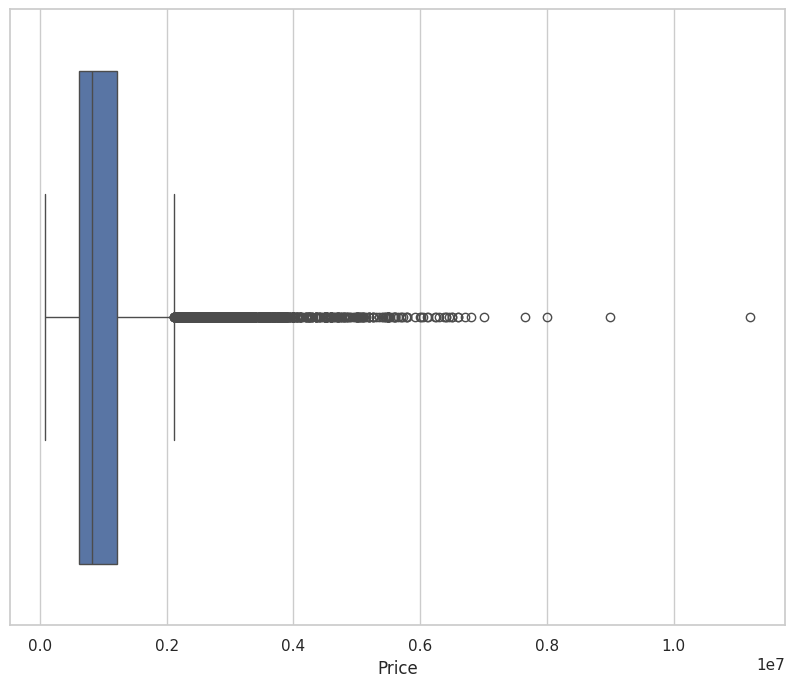

In [20]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x='Price', data=clean_df, orient='v')


<Axes: xlabel='Type', ylabel='Price'>

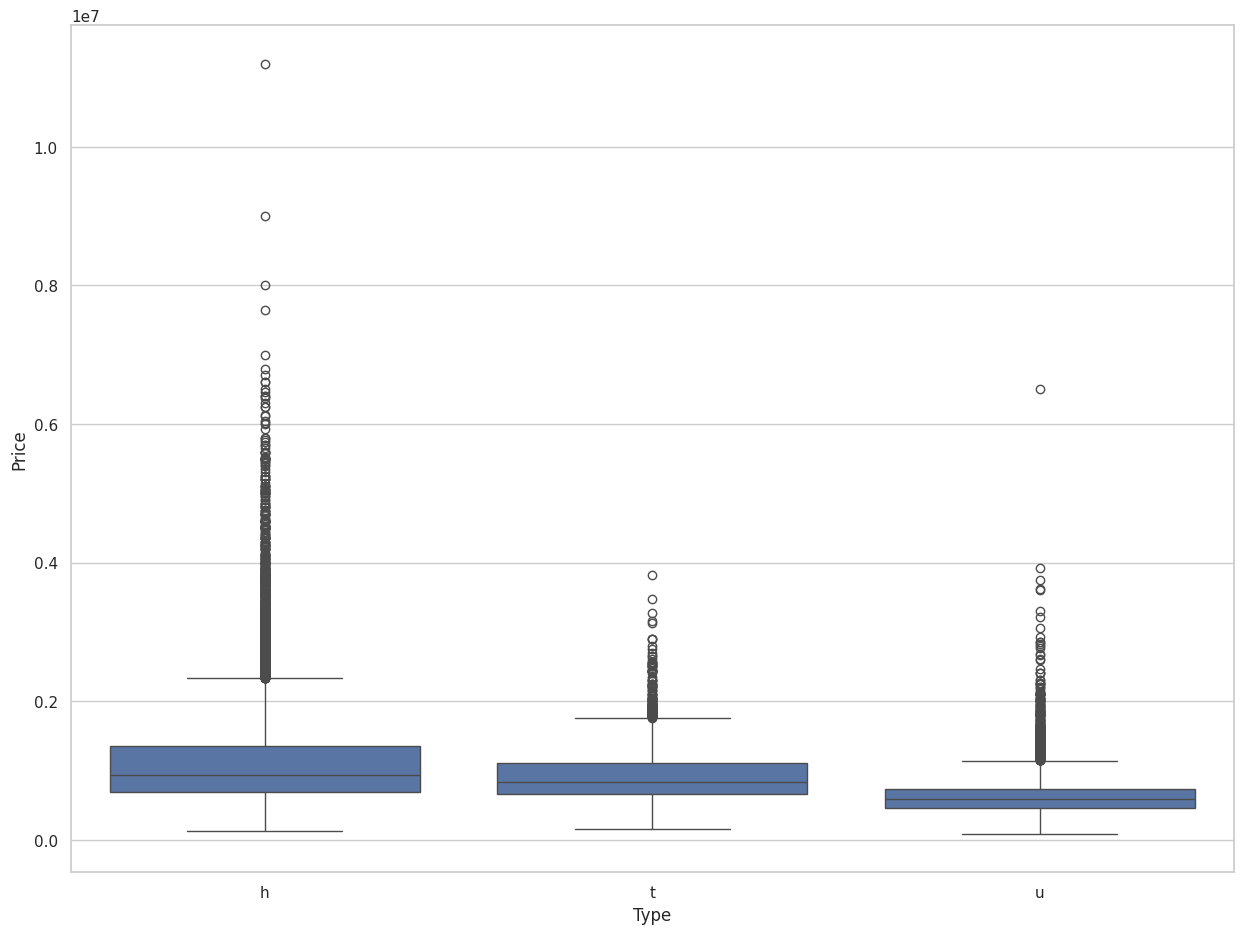

In [29]:
# checking the price for different types of house
plt.figure(figsize = (15, 11))
sns.boxplot(x = 'Type', y = 'Price', data = df, orient = 'v')

In [27]:
df.groupby('Type')['Price'].median()

,Price
Type,
h,935000.0
t,830000.0
u,585000.0


In [32]:
# exploring region-wise
regions = clean_df['Regionname']
print("Types of regions", len(set(regions)))

Types of regions 8


<ipython-input-35-e4811149e87d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'South-Eastern Metropolitan'),
 Text(4, 0, 'Eastern Metropolitan'),
 Text(5, 0, 'Northern Victoria'),
 Text(6, 0, 'Eastern Victoria'),
 Text(7, 0, 'Western Victoria')]

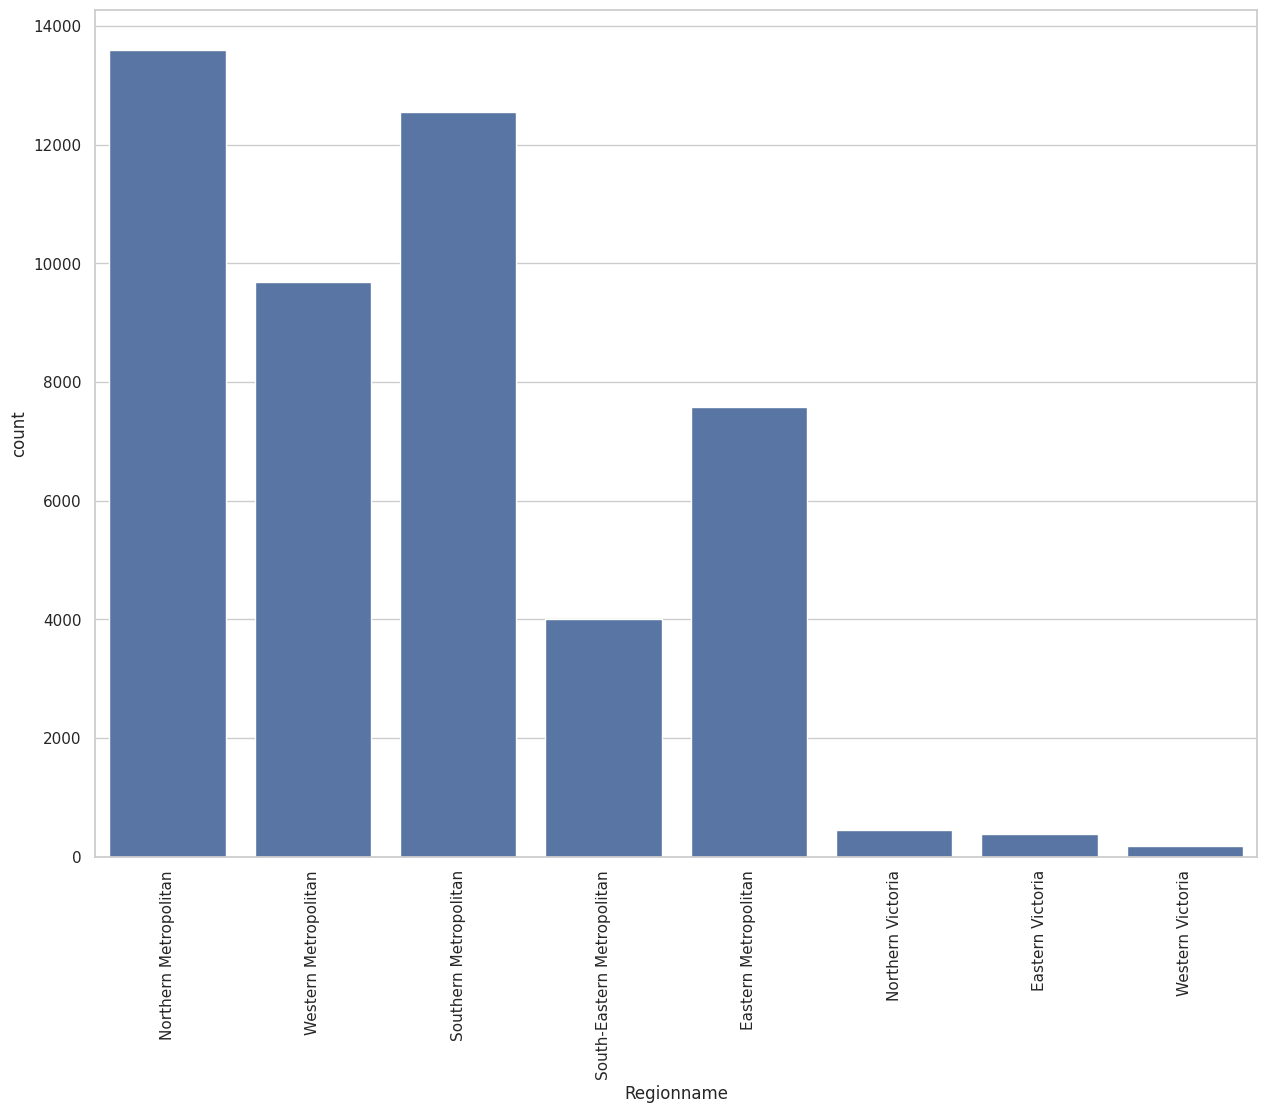

In [35]:
plt.figure(figsize = (15, 11))
chart = sns.countplot(x = 'Regionname', data = clean_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

In [40]:
clean_df['Method'].unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [42]:
method = clean_df["Method"]
print("types of methods", len(set(method)))

types of methods 5


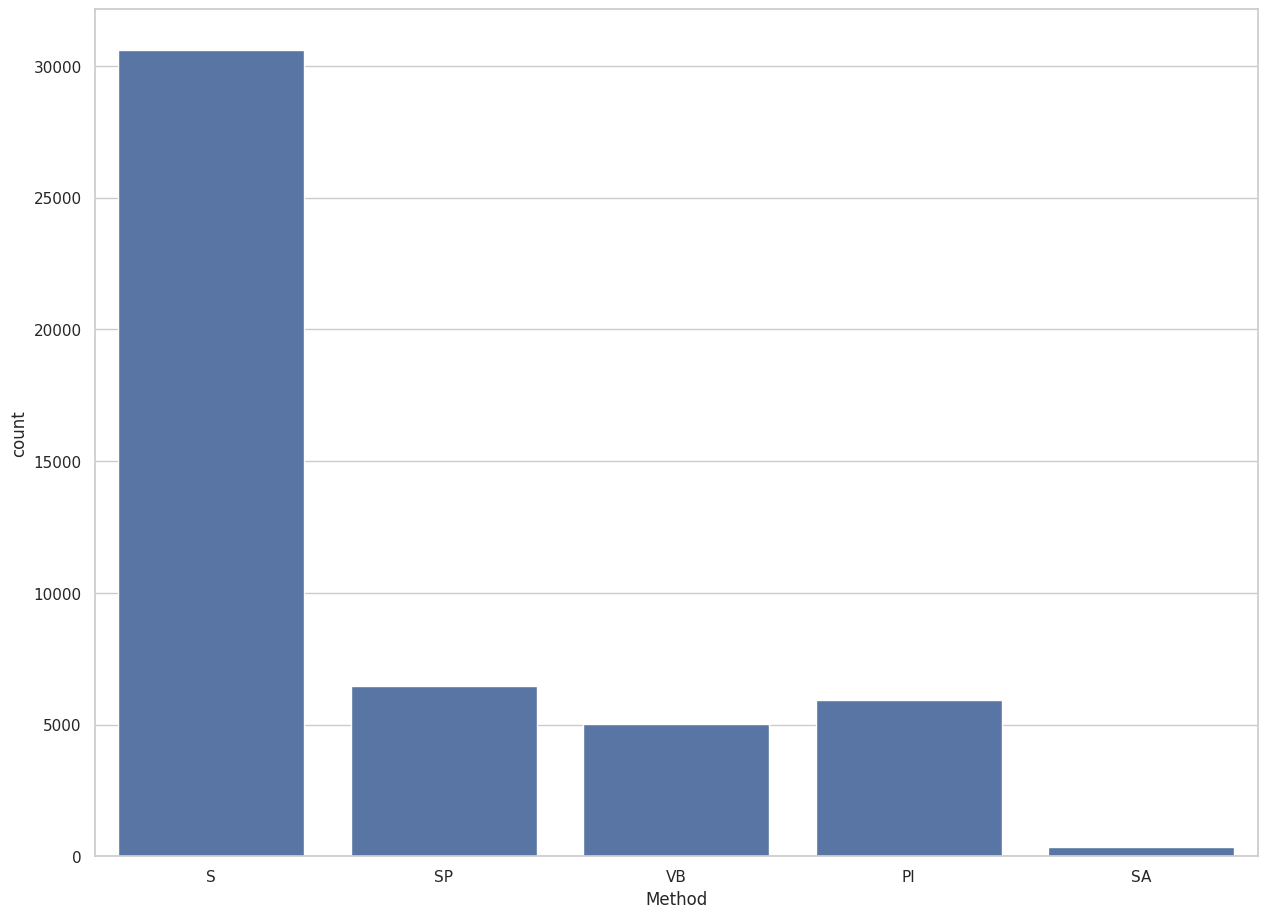

In [46]:
plt.figure(figsize = (15, 11))
chart = sns.countplot(x = "Method", data = clean_df)
chart.set_xticklabels(chart.get_xticklabels())

## Skewed distributions

When counting frequencies it is quite common to have many data points for a certain range of values and much less for the rest of the values. When this happens we say the distribution is not symmetric but skewed. The data distirbuted can be either postively skewed or negatively skewed.


<ipython-input-51-35d1d4ef11a8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_ages, bins = 10, kde = False)


<Axes: xlabel='Student Ages'>

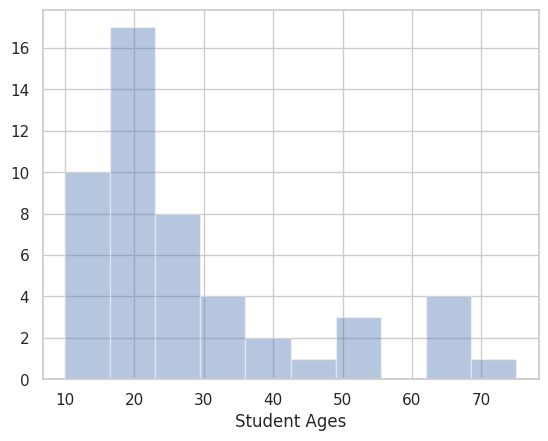

In [51]:
student_ages = pd.Series([15,19,18,14,13,
 27,16,65,15,31,
 22,15,24,22,51,
 24,20,45,22,33,
 24,27,18,66,15,
 18,39,10,30,13,
 19,28,53,28,65,
 30,20,21,20,18,
 20,23,18,41,52,
 75,19,63,14,18],
                         name = "Student Ages")
sns.distplot(student_ages, bins = 10, kde = False)

,Student Ages
0,15
1,19
2,18
3,14
4,13
5,27
6,16
7,65
8,15
9,31
